In [63]:
%%bash
gpustat
CUDA_VISIBLE_DEVICES="7"



hyperion  Thu Mar 28 19:34:41 2019
[0] TITAN X (Pascal) | 80'C,  98 % |  8799 / 12196 MB | s171854(8789M)
[1] TITAN X (Pascal) | 85'C,  98 % |  7409 / 12196 MB | s171854(7399M)
[2] TITAN X (Pascal) | 34'C,   0 % |     0 / 12196 MB |
[3] TITAN X (Pascal) | 22'C,   0 % |     0 / 12196 MB |
[4] TITAN X (Pascal) | 23'C,   0 % |     0 / 12196 MB |
[5] TITAN X (Pascal) | 23'C,   0 % |     0 / 12196 MB |
[6] TITAN X (Pascal) | 79'C,  69 % |  7407 / 12196 MB | s171854(7397M)
[7] TITAN X (Pascal) | 26'C,   0 % |    10 / 12196 MB |


bash: module: line 1: syntax error: unexpected end of file
bash: error importing function definition for `module'


In [64]:
import os
import sys
#os.environ["CUDA_VISIBLE_DEVICES"]="7"

from pandas import DataFrame
from IPython.display import HTML


In [65]:
!ls /home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/fastai/
!ls /home/maghoi/course-v3/tools/
#!grep DataBunch /home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/fastai/*

basic_data.py	core.py		__init__.py  tabular	    vision
basics.py	data_block.py	launch.py    text	    widgets
basic_train.py	datasets.py	layers.py    torch_core.py
callback.py	distributed.py	metrics.py   train.py
callbacks	gen_doc		__pycache__  utils
collab.py	imports		script.py    version.py
build-site.sh  fastai-nbstripout  run-after-git-clone  trust-origin-git-config


In [66]:
from sklearn import metrics


In [67]:
import numpy as np
import pandas as pd
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""
np.random.seed(12345)
import matplotlib.pyplot as plt
%matplotlib inline

from fastai.basic_data import *
from fastai.basic_train import *
from fastai.data_block import *
from fastai.metrics import *
from fastai.train import *
from fastai.utils import *
from fastai.core import *
from fastai.gen_doc import *

#from fastai import Learner,DataBunch

import torch
import torch.nn as nn
import torch.utils.data as tdatautils

import glob
import re


### Data loader
- X shape (complexes, amino positions, features) = (1464, 455, 9)
- Vector of complexes
- Vector of amino acids
- Dstack features with residues

In [68]:
!ls -al /scratch/maghoi/pMHC_data/features5/*.csv

-rw-r--r-- 1 maghoi unixusers 10109 Mar 28 16:13 /scratch/maghoi/pMHC_data/features5/1g6r_1p_N1_1t_80s_pMHC-TCR.csv
-rw-r--r-- 1 maghoi unixusers 10101 Mar 28 16:13 /scratch/maghoi/pMHC_data/features5/1g6r_1p_N1_1t_90s_pMHC-TCR.csv
-rw-r--r-- 1 maghoi unixusers 10106 Mar 28 16:13 /scratch/maghoi/pMHC_data/features5/1g6r_1p_N1_1t_95s_pMHC-TCR.csv
-rw-r--r-- 1 maghoi unixusers 10124 Mar 28 16:13 /scratch/maghoi/pMHC_data/features5/1g6r_1p_N1_1t_99s_pMHC-TCR.csv
-rw-r--r-- 1 maghoi unixusers 10108 Mar 28 16:13 /scratch/maghoi/pMHC_data/features5/1g6r_1p_N2_1t_80s_pMHC-TCR.csv
-rw-r--r-- 1 maghoi unixusers 10105 Mar 28 16:13 /scratch/maghoi/pMHC_data/features5/1g6r_1p_N2_1t_90s_pMHC-TCR.csv
-rw-r--r-- 1 maghoi unixusers 10108 Mar 28 16:13 /scratch/maghoi/pMHC_data/features5/1g6r_1p_N2_1t_95s_pMHC-TCR.csv
-rw-r--r-- 1 maghoi unixusers 10122 Mar 28 16:13 /scratch/maghoi/pMHC_data/features5/1g6r_1p_N2_1t_99s_pMHC-TCR.csv
-rw-r--r-- 1 maghoi unixusers 10118 Mar 28 16:13 /scratch/maghoi/pMHC_da

In [70]:
filelist = glob.glob("/scratch/maghoi/pMHC_data/features5/*.csv"); filelist

['/scratch/maghoi/pMHC_data/features5/1g6r_1p_N1_1t_80s_pMHC-TCR.csv',
 '/scratch/maghoi/pMHC_data/features5/3tjh_4p_P1_1t_90s_pMHC-TCR.csv',
 '/scratch/maghoi/pMHC_data/features5/2bnq_2p_P1_1t_99s_pMHC-TCR.csv',
 '/scratch/maghoi/pMHC_data/features5/1g6r_1p_N1_1t_90s_pMHC-TCR.csv',
 '/scratch/maghoi/pMHC_data/features5/1g6r_1p_N1_1t_95s_pMHC-TCR.csv',
 '/scratch/maghoi/pMHC_data/features5/1mwa_1p_N3_1t_99s_pMHC-TCR.csv',
 '/scratch/maghoi/pMHC_data/features5/1mwa_1p_P1_1t_80s_pMHC-TCR.csv',
 '/scratch/maghoi/pMHC_data/features5/1mwa_1p_P1_1t_90s_pMHC-TCR.csv',
 '/scratch/maghoi/pMHC_data/features5/1mwa_1p_P1_1t_95s_pMHC-TCR.csv',
 '/scratch/maghoi/pMHC_data/features5/1mwa_1p_P1_1t_99s_pMHC-TCR.csv',
 '/scratch/maghoi/pMHC_data/features5/1mwa_1p_R1_1t_80s_pMHC-TCR.csv',
 '/scratch/maghoi/pMHC_data/features5/1mwa_1p_R1_1t_90s_pMHC-TCR.csv',
 '/scratch/maghoi/pMHC_data/features5/1mwa_1p_R1_1t_95s_pMHC-TCR.csv',
 '/scratch/maghoi/pMHC_data/features5/1mwa_1p_R1_1t_99s_pMHC-TCR.csv',
 '/scr

### Load data

In [71]:
filelist_loaded = []
filelist = glob.glob("/scratch/maghoi/pMHC_data/features5/*.csv"); len(filelist)
for i in range(0, len(filelist)):
    df = pd.read_csv(filelist[i])
    #df = df.drop(["Unnamed: 0", "Num", "pACC", "CNb"], axis = 1)

    #Convert categorical values (res + solvent acc cateogry) to string
    #df.iloc[:, 0:2] = df.iloc[:, 0:2].astype(int).astype(str)
    filelist_loaded.append(df)

In [72]:
filelist_loaded[1463]

1mwa_1p_N3_1t_95s_pMHC-TCR Sequence SSE CLE  ACC  pACC  CNa  CNb  Type
0                             0        G   L   R    2    95    2    2     1
1                             1        P   L   R    2    56    4    5     1
2                             2        H   E   E    1    34    6    7     1
3                             3        S   E   F    0    10    9    9     1
4                             4        L   E   D    0     0   11    9     1
5                             5        R   E   E    1    18    8    7     1
6                             6        Y   E   E    0     0    9   10     1
7                             7        F   E   E    1    33    8    8     1
8                             8        V   E   E    0     2    8   12     1
9                             9        T   E   E    1    13    8    7     1
10                           10        A   E   E    0     3   10   11     1
11                           11        V   E   E    1    28    7    6     1
12                           12        S   E   C    1    16    8    7     1
13                           13        R   E   E    1    33    7    5     1
14                           14        P   T   E    1    39    5    4     1
15                           15        G   T   N    2   100    0    0     1
16                           16        L   T   M    2    71    0    0     1
17                           17        G   E   L    2    62    1    1     1
18                           18        E   E   Q    2    54    2    3     1
19                           19        P   E   C    1    19    6    8     1
20                           20        R   E   C    1    27    8    7     1
21                           21        Y   E   E    0     1    9   11     1
22                           22        M   E   E    1    18    7    8     1
23                           23        E   E   E    0     0    8   10     1
24                           24        V   E   E    0     5    8    8     1
25                           25        G   E   E    0     0    9   10     1
26                           26        Y   E   E    1    25    9    8     1
27                           27        V   E   E    0     0    9   10     1
28                           28        D   T   N    1    35    4    3     1
29                           29        D   T   O    2    71    3    2     1
..                          ...      ...  ..  ..  ...   ...  ...  ...   ...
438                         438        G   T   N    0     4    7    8     4
439                         439        T   E   G    1    24    3    6     4
440                         440       -1  -1  -1   -1    -1   -1   -1     4
441                         441       -1  -1  -1   -1    -1   -1   -1     4
442                         442       -1  -1  -1   -1    -1   -1   -1     4
443                         443       -1  -1  -1   -1    -1   -1   -1     4
444                         444       -1  -1  -1   -1    -1   -1   -1     4
445                         445       -1  -1  -1   -1    -1   -1   -1     4
446                         446       -1  -1  -1   -1    -1   -1   -1     4
447                         447       -1  -1  -1   -1    -1   -1   -1     4
448                         448       -1  -1  -1   -1    -1   -1   -1     4
449                         449       -1  -1  -1   -1    -1   -1   -1     4
450                         450       -1  -1  -1   -1    -1   -1   -1     4
451                         451       -1  -1  -1   -1    -1   -1   -1     4
452                         452       -1  -1  -1   -1    -1   -1   -1     4
453                         453       -1  -1  -1   -1    -1   -1   -1     4
454                         454       -1  -1  -1   -1    -1   -1   -1     4
455                         455       -1  -1  -1   -1    -1   -1   -1     4
456                         456        L   E   E    0     5    5   11     4
457                         457        Y   E   E    2    50    5    7     4
458                         458        F   E   F    0

In [73]:
for i in range(len(filelist_loaded[:])):
    print(filelist_loaded[i].shape)

(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(468, 9)
(

In [74]:
filelist[1463]

'/scratch/maghoi/pMHC_data/features5/1mwa_1p_N3_1t_95s_pMHC-TCR.csv'

In [75]:
import sys
sys.path.append("fastai/old/")
from fastai_v7.structured import *
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, OneHotEncoder


### Preparing for one-hot encoding including dummy appended rows
- Check number of unique values
- To generate similar shaped dfs, need to ensure each value is present to generate the 1-hot columns
- -> append dummy rows with all values
- One hot encode

In [22]:
HTML(DataFrame(filelist_loaded[0]).to_html())

Checking unique values

In [219]:
i = 0
#Process categorical to values using fast.ai proc_df (only processes string values)
df = proc_df(filelist_loaded[i])[0] 
print(df.shape)

#Change proc_df´ed values to 0 = missing value, 1 as lowest real value
df.iloc[:, [1, 2, 3]] = df.iloc[:, [1, 2, 3]] - 1
print(df.shape)

#Change rest of features to 0 = missing value, 1 as lowest real value
df.iloc[:, [0, 4, 5, 6, 7]] = df.iloc[:, [0, 4, 5, 6, 7]] + 1
print(df.shape)

df.describe()


(468, 9)
(468, 9)
(468, 9)


1g6r_1p_N1_1t_80s_pMHC-TCR    Sequence         SSE         CLE  \
count                  468.000000  468.000000  468.000000  468.000000   
mean                   234.500000    9.532051    3.320513    6.521368   
std                    135.244224    6.674526    2.108372    4.789976   
min                      1.000000    0.000000    0.000000    0.000000   
25%                    117.750000    4.000000    2.000000    4.000000   
50%                    234.500000   10.000000    3.000000    5.000000   
75%                    351.250000   16.000000    5.000000    9.000000   
max                    468.000000   20.000000    7.000000   18.000000   

              ACC        pACC         CNa         CNb        Type  
count  468.000000  468.000000  468.000000  468.000000  468.000000  
mean     1.649573   25.079060    5.826923    6.271368    2.497863  
std      0.988727   26.666152    3.395103    3.877828    1.271494  
min      0.000000    0.000000    0.000000    0.000000    1.000000  
25%      1.000000    1.750000    3.750000    3.000000    1.000000  
50%      2.000000   15.500000    6.000000    7.000000    3.000000  
75%      2.000000   43.250000    9.000000    9.000000    4.000000  
max      3.000000  101.000000   13.000000   15.000000    4.000000

- Generating dummy value

In [171]:
dummy = pd.DataFrame({"Positon": np.tile(range(1,2), 21)[0:21],
            "Sequence": range(0,21),
            "SSE": np.tile(range(0,8), 6)[0:21],
            "CLE": np.tile(range(0,18), 6)[0:21],
            "ACC": np.tile(range(0,4), 6)[0:21],
            "pACC": np.tile(range(1,2), 21)[0:21],
            "CNa": np.tile(range(1,2), 21)[0:21],
            "CNb": np.tile(range(1,2), 21)[0:21],
            "Type": np.tile(range(1,5), 7)[0:21]})
dummy

Positon  Sequence  SSE  CLE  ACC  pACC  CNa  CNb  Type
0         1         0    0    0    0     1    1    1     1
1         1         1    1    1    1     1    1    1     2
2         1         2    2    2    2     1    1    1     3
3         1         3    3    3    3     1    1    1     4
4         1         4    4    4    0     1    1    1     1
5         1         5    5    5    1     1    1    1     2
6         1         6    6    6    2     1    1    1     3
7         1         7    7    7    3     1    1    1     4
8         1         8    0    8    0     1    1    1     1
9         1         9    1    9    1     1    1    1     2
10        1        10    2   10    2     1    1    1     3
11        1        11    3   11    3     1    1    1     4
12        1        12    4   12    0     1    1    1     1
13        1        13    5   13    1     1    1    1     2
14        1        14    6   14    2     1    1    1     3
15        1        15    7   15    3     1    1    1     4
16        1        16    0   16    0     1    1    1     1
17        1        17    1   17    1     1    1    1     2
18        1        18    2    0    2     1    1    1     3
19        1        19    3    1    3     1    1    1     4
20        1        20    4    2    0     1    1    1     1

In [172]:
len(df.columns.values), len(dummy.columns.values)

(9, 9)

In [173]:
df.columns = dummy.columns.values

In [174]:
df.append(dummy)

Positon  Sequence  SSE  CLE  ACC  pACC  CNa  CNb  Type
0          1         6    5   18    3   100    3    3     1
1          2        13    5   18    3    71    5    6     1
2          3         7    2    5    2    30    7    9     1
3          4        16    2    6    2    13    8   10     1
4          5        10    2    4    1     1   10   10     1
5          6        15    2    5    2    27    9    8     1
6          7        20    2    5    1     1    9   11     1
7          8         5    2    5    2    32    8    9     1
8          9        18    2    5    1     3    8   14     1
9         10        17    2    5    2    35    9    7     1
10        11         1    2    5    1     7   11   11     1
11        12        18    2    5    2    23    8    7     1
12        13        16    2    4    1     7    9    7     1
13        14        15    2    5    2    30    8    6     1
14        15        13    7    5    2    30    7    5     1
15        16         6    7   14    3   101    2    2     1
16        17        10    7   10    3    75    1    1     1
17        18         6    2   12    3    54    2    2     1
18        19         4    2   17    3    49    4    4     1
19        20        13    2    3    2    21    7   10     1
20        21        15    2    3    2    31    9    8     1
21        22        20    2    5    1     2   11   12     1
22        23        11    2    5    2    24    8    9     1
23        24         4    2    5    1     1    9   10     1
24        25        18    2    5    2    15    9    9     1
25        26         6    2    5    1     1   10   11     1
26        27        20    2    5    2    25    8    9     1
27        28        18    2    2    1     1   10    9     1
28        29         3    7   14    2    23    6    4     1
29        30         3    7   14    3    91    1    1     1
..       ...       ...  ...  ...  ...   ...  ...  ...   ...
459      460         6    5    4    1     6   10   10     4
460      461         1    5    1    3    51   10    7     4
461      462         6    5   12    1     4   10   10     4
462      463        17    2    4    1     2   11   12     4
463      464        15    2    5    2    38    9    7     4
464      465        10    2    5    1     1   10   15     4
465      466        16    2    5    2    24    8    5     4
466      467        18    2    5    1     6   11   12     4
467      468        10    5   18    3    76    7    6     4
0          1         0    0    0    0     1    1    1     1
1          1         1    1    1    1     1    1    1     2
2          1         2    2    2    2     1    1    1     3
3          1         3    3    3    3     1    1    1     4
4          1         4    4    4    0     1    1    1     1
5          1         5    5    5    1     1    1    1     2
6          1         6    6    6    2     1    1    1     3
7          1         7    7    7    3     1    1    1     4
8          1         8    0    8    0     1    1    1     1
9          1         9    1    9    1     1    1    1     2
10         1        10    2   10    2     1    1    1     3
11         1        11    3   11    3     1    1    1     4
12         1        12    4   12    0     1    1    1     1
13         1        13    5   13    1     1    1    1     2
14         1        14    6   14    2     1    1    1     3
15         1        15    7   15    3     1    1    1     4
16         1        16    0   16    0     1    1    1     1
17         1        17    1   17    1     1    1    1     2
18         1        18    2    0    2     1    1    1     3
19         1        19    3    1    3     1    1    1     4
20         1        20    4    2    0     1    1    1     1

[489 rows x 9 columns]

### One-hot, remove columns for empty values, normalize continuous features including position

In [203]:
import warnings
warnings.filterwarnings(action='once')
warnings.simplefilter('ignore')

In [212]:
dfs = []
for i in range(len(filelist_loaded)):
    #Process categorical to values using fast.ai proc_df (only processes string values)
    df = proc_df(filelist_loaded[i])[0] 
    if len(df) != 468:
        print("Expected df length", 468, "found", len(df))
        break

    #Change proc_df´ed values to 0 = missing value, 1 as lowest real value
    #Change rest of features to 0 = missing value, 1 as lowest real value
    df.iloc[:, [1, 2, 3]] = df.iloc[:, [1, 2, 3]] - 1
    df.iloc[:, [0, 4, 5, 6, 7]] = df.iloc[:, [0, 4, 5, 6, 7]] + 1

    #Append dummy column
    df.columns = dummy.columns.values
    df = df.append(dummy)

    #One-hot encoding for Sequence, SSE, CLE, ACC, type
    onehotencoder = OneHotEncoder(categorical_features = [1, 2, 3, 4, 8])
    df = onehotencoder.fit_transform(df).toarray()
    
    #Remove 1-hot columns encoding missing positions where value = 1 (unnecessary)
    #Remove dummy columns
    df = np.delete(df, [0, 21, 29, 48, 55], axis = 1)
    df = df[0:468]
    
    #Normalization for columns sequence position, pACC, CNa, CNb
    df[:, -4: ] = preprocessing.normalize(df[:, -4: ])
    
    dfs.append(df)
    
    if df.shape != (468, 55):
        print(i, "expected shape", (468, 55), "got", df.shape)
        break

In [214]:
dfs[1463].shape

(468, 55)

In [215]:
a = pd.DataFrame(dfs[1463]).describe()
HTML(DataFrame(a).to_html())

Check for columns to drop among rows with known missing values

In [216]:
HTML(DataFrame(dfs[1463]).to_html())

In [188]:
pd.DataFrame(dfs[0][440] == 1) # Can drop positions 0, 21, 29, 48, 55

0
0    True
1   False
2   False
3   False
4   False
5   False
6   False
7   False
8   False
9   False
10  False
11  False
12  False
13  False
14  False
15  False
16  False
17  False
18  False
19  False
20  False
21   True
22  False
23  False
24  False
25  False
26  False
27  False
28  False
29   True
30  False
31  False
32  False
33  False
34  False
35  False
36  False
37  False
38  False
39  False
40  False
41  False
42  False
43  False
44  False
45  False
46  False
47  False
48   True
49  False
50  False
51  False
52  False
53  False
54  False
55   True
56  False
57  False
58  False
59  False

### Pre-process

In [536]:
ix_train = 1080
ix_val = 256
ix_test = 128
data_size=1464

ix_test = data_size - ix_test
ix_val = ix_test - ix_val
ix_train = ix_val - ix_train

print(data_size)
print(ix_test)
print(ix_val)
print(ix_train)

1464
1336
1080
0


In [ ]:
### Start position 0
def data_generator(ix_train = 1080, ix_val = 256, ix_test = 128, data_size=1464):
        filelist = glob.glob("/scratch/maghoi/pMHC_data/features5/*.csv"); len(filelist)
        
        filelist_loaded = []
        ix_test = data_size - ix_test
        ix_val = ix_test - ix_val
        ix_train = ix_val - ix_train
        
        #Load data into dfs
        for i in range(0, len(filelist)):
            df = pd.read_csv(filelist[i])
            #df = df.drop(["Unnamed: 0", "Num", "pACC", "CNb"], axis = 1)
            
            #Convert categorical values (res + solvent acc cateogry) to string
            #df.iloc[:, 0:2] = df.iloc[:, 0:2].astype(int).astype(str)
            filelist_loaded.append(df)

        #Initialize empty df ordered by complexes and aminos
        dim1 = range(0, data_size)
        dim2 = filelist_loaded[0].index.values
        dim3 = filelist_loaded[0].columns
        x = np.zeros(shape = (len(dim1), len(dim2), len(dim3)))

        for i in range(0, data_size):
            x[i] = filelist_loaded[i]

        #Encode y fresh
        y = np.zeros(shape = (data_size), dtype="int64")

        counter_x = range(0, data_size)
        counter_y = range(len(y))

        for c_x, c_y in zip(counter_x, counter_y):
            r = re.compile(r'.*P1.*')
            if bool(r.match(filelist[c_x])):
                y[c_y] = 1
                
        X_train, y_train = x[0 : ix_val], y[0 : ix_val]
        X_val, y_val = x[ix_val : ix_test], y[ix_val : ix_test]
        X_test, y_test = x[ix_test : ], y[ix_test : ]
        return X_train, y_train, X_val, y_val, X_test, y_test


### Load data

In [542]:
%%time
X,y, X_val, y_val, X_test, y_test = data_generator()


ValueError: could not convert string to float: 'R'

In [491]:
sum(X[0] == X[20])

array([405, 405, 405, 405, 405])

In [489]:
sum(X[0] == X[0])

array([405, 405, 405, 405, 405])

In [484]:
#display all through HTML
from pandas import DataFrame
from IPython.display import HTML
HTML(DataFrame(X[0]).to_html())

In [486]:
HTML(DataFrame(X[150]).to_html())

### Change values to categorical

In [429]:
import sys
sys.path.append("fastai/old/")
from fastai_v7.structured import *

### 1.b Map the data to float/int as appropriate

Classification requires that targets are type INT

In [430]:
def to_torch_data(x,np_type,tch_type):
    return torch.from_numpy(x.astype(np_type)).to(tch_type)

X,X_val,X_test = map(lambda x: to_torch_data(x,float,torch.float32),(X,X_val,X_test))
y,y_val,y_test = map(lambda x: to_torch_data(x,int,torch.int64),(y,y_val,y_test))

In [431]:
train_ds = tdatautils.TensorDataset(X,y)
valid_ds = tdatautils.TensorDataset(X_val,y_val)
test_ds = tdatautils.TensorDataset(X_test,y_test)

#Load data
batch_size = 1
my_data_bunch = DataBunch.create(train_ds,valid_ds,test_ds,bs=batch_size)

In [432]:
X.shape

torch.Size([1080, 405, 5])

In [433]:
#weights = make_weights_for_balanced_classes(dataset_train.imgs, len(dataset_train.classes))                                                                
weights2 = np.where(y == 1, 4, 1); weights
weights2 = torch.DoubleTensor(weights2)                                       
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights2, len(weights))                     
                                                                                
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32,                              
                                        sampler = sampler, num_workers=2, pin_memory=True)   

valid_loader = torch.utils.data.DataLoader(valid_ds, batch_size=32,                              
                                        sampler = sampler, num_workers=2, pin_memory=True) 

test_loader = torch.utils.data.DataLoader(test_ds, batch_size=32,                              
                                        sampler = sampler, num_workers=2, pin_memory=True) 


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/torch/utils/data/sampler.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.weights = torch.tensor(weights, dtype=torch.double)


In [434]:
!gpustat

hyperion  Tue Mar 26 12:16:10 2019
[0] TITAN X (Pascal) | 81'C,  81 % | 11353 / 12196 MB | s171854(11343M)
[1] TITAN X (Pascal) | 84'C,  43 % | 11311 / 12196 MB | s171854(11301M)
[2] TITAN X (Pascal) | 80'C, 100 % |  8863 / 12196 MB | s123106(8851M)
[3] TITAN X (Pascal) | 76'C, 100 % |  9857 / 12196 MB | s123106(9845M)
[4] TITAN X (Pascal) | 72'C, 100 % | 11297 / 12196 MB | s123106(11287M)
[5] TITAN X (Pascal) | 74'C,   0 % | 10215 / 12196 MB | s123106(10203M)
[6] TITAN X (Pascal) | 22'C,   0 % |     0 / 12196 MB |
[7] TITAN X (Pascal) | 24'C,   0 % |   645 / 12196 MB | maghoi(635M)


In [435]:
device = torch.device("cuda:7" if torch.cuda.is_available() else "cpu")

In [436]:
#Define weights
zeros = valid_ds.tensors[1].tolist().count(0)
ones = valid_ds.tensors[1].tolist().count(1)
total = zeros + ones
weights = torch.tensor([zeros / total, ones / total]).cuda() #Remember to send to GPU
weights

tensor([0.8281, 0.1719], device='cuda:0')

In [17]:
valid_ds.tensors[0].shape

torch.Size([256, 405, 5])

In [92]:
test_ds[15:20][1]

tensor([1, 0, 0, 0, 0])

In [98]:
y_test

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

### Attempt to make weighted datasampler

In [437]:
#weights = make_weights_for_balanced_classes(dataset_train.imgs, len(dataset_train.classes))                                                                
weights2 = np.where(y == 1, 4, 1); weights
weights2 = torch.DoubleTensor(weights2)                                       
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights2, len(weights))                     
                                                                                
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32,                              
                                        sampler = sampler, num_workers=2, pin_memory=True)   

valid_loader = torch.utils.data.DataLoader(valid_ds, batch_size=32,                              
                                        sampler = sampler, num_workers=2, pin_memory=True) 




/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/torch/utils/data/sampler.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.weights = torch.tensor(weights, dtype=torch.double)


In [438]:
batch_size = 1
secret_size = 401
n_hid = 5
my_data_bunch = DataBunch.create(train_loader, valid_loader, bs=batch_size, device=torch.device("cuda"))
#my_data_bunch = DataBunch.create(train_ds, valid_ds,test_ds,bs=batch_size, device=torch.device("cuda"))
#my_data_bunch = DataBunch.create(train_ds,valid_ds,test_ds,bs=batch_size)
criterion = nn.CrossEntropyLoss() 
#criterion = nn.CrossEntropyLoss(weight = weights) 

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv1d(in_channels = 5, out_channels = 1, kernel_size = 3)
        self.maxpool1 = nn.MaxPool1d(kernel_size = 3)
        self.Relu1 = nn.LeakyReLU()
        self.Linear1 = nn.Linear(in_features = 134, out_features = 2)
        #self.Linear2 = nn.Linear(in_features = 1, out_features = 2)

    def forward(self, x):
        print("\nInput", x.shape)
        x = x.transpose(2, 1)
        print("Transposed", x.shape)
        
        x = self.conv1(x)
        print("Conv1:", x.shape)
        
        x = self.maxpool1(x)
        print("Maxpool", x.shape)
        
        x = self.Relu1(x)
        print("Relu", x.shape)
              
        #x = x.reshape(batch_size, 405)
        #print("Reshape1", x.shape)
        
        x = self.Linear1(x)
        print("Linear1", x.shape)
        
        x = x.reshape(batch_size, 2)
        print("Reshape2", x.shape)
        
        #x = self.Linear2(x)
        print("End:", x.shape)
        print("End:", x)
        return x
    
#print(net)  
#print( 'trainable params: {}'.format(count_model_params(net)) )
net = Model().cuda()

my_learner = Learner(my_data_bunch,
                     net,
                     opt_func=torch.optim.Adam,
                     loss_func=criterion, metrics=accuracy)
my_learner.fit_one_cycle(4, 0.1)


TypeError: Traceback (most recent call last):
  File "/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
TypeError: 'DataLoader' object does not support indexing


In [121]:
my_learner.get_preds()

[tensor([[0.7077, 0.2923],
         [0.7077, 0.2923],
         [0.7077, 0.2923],
         [0.7077, 0.2923],
         [0.7077, 0.2923]]), tensor([0, 0, 0, 0, 1])]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


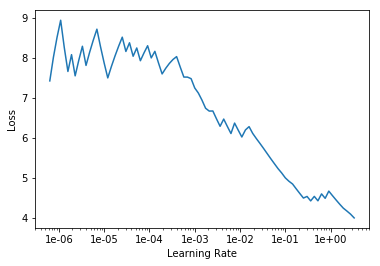

In [116]:
my_learner.lr_find()
my_learner.recorder.plot()

In [ ]:
my_learner.get_preds()

In [444]:
my_data_bunch.

DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7fcfc410b9b0>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7fcfc410b400>;

Test: None

In [453]:
valid_ds.tensors[0:10]

(tensor([[[ 6.,  5., 18.,  2.,  2.],
          [13.,  5., 18.,  2.,  4.],
          [ 7.,  2.,  5.,  1.,  6.],
          ...,
          [16.,  2.,  5.,  1.,  7.],
          [18.,  2.,  5.,  0., 10.],
          [10.,  5., 18.,  2.,  6.]],
 
         [[ 6.,  5., 18.,  2.,  2.],
          [13.,  5., 18.,  2.,  4.],
          [ 7.,  2.,  5.,  1.,  6.],
          ...,
          [16.,  2.,  5.,  1.,  7.],
          [18.,  2.,  5.,  0., 10.],
          [10.,  5., 18.,  2.,  6.]],
 
         [[ 6.,  5., 18.,  2.,  2.],
          [13.,  5., 18.,  2.,  4.],
          [ 7.,  2.,  5.,  1.,  6.],
          ...,
          [16.,  2.,  5.,  1.,  7.],
          [18.,  2.,  5.,  0., 10.],
          [10.,  5., 18.,  2.,  6.]],
 
         ...,
 
         [[ 6.,  5., 18.,  2.,  2.],
          [13.,  5., 18.,  2.,  4.],
          [ 7.,  2.,  5.,  1.,  6.],
          ...,
          [16.,  2.,  5.,  1.,  7.],
          [18.,  2.,  5.,  0., 10.],
          [10.,  5., 18.,  2.,  6.]],
 
         [[ 6.,  5., 18.

In [441]:
batch_size = 32
secret_size = 401
n_hid = 5
my_data_bunch = DataBunch.create(valid_ds,test_ds,bs=batch_size)
#my_data_bunch = DataBunch.create(train_ds,valid_ds,test_ds,bs=batch_size)
criterion = nn.CrossEntropyLoss() 

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        #In BS x 405 x 5
        self.conv1 = nn.Conv1d(in_channels = 5, out_channels = 5, kernel_size = 3)
        # Conv: BS x 1 x 5
        self.Relu1 = nn.LeakyReLU()
        #Linear expects: BS * 5
        # all but last must be same dims
        self.Linear1 = nn.Linear(in_features = 403, out_features = 1)
        self.Linear2 = nn.Linear(in_features = 5, out_features = 2)

    def forward(self, x):
        print("Input", x.shape)
        x = x.transpose(1, 2)
        print("Transposed:", x.shape)
        #Re-shape 405x5 to 5x405 to train on amino acids
        #x.reshape(input_size, 5, 405)
        x = self.conv1(x)
        print("Conv1:", x.shape)
        #print(x)
        x = self.Relu1(x)
        print("Relu", x.shape)
        #x = x.reshape(batch_size, 5, 306)
        # BS * 5
        x = self.Linear1(x)
        #Linear expects 10x4 = [2*5] x [BS*2]
        print("Linear", x.shape)
        x = x.reshape(batch_size, n_hid)
        print("Reshape", x.shape)
        x = self.Linear2(x)
        print("\nEnd:", x.shape)
        print("End:", x)
        return x
    
#print(net)  
#print( 'trainable params: {}'.format(count_model_params(net)) )
net = Model().cuda()

my_learner = Learner(my_data_bunch,
                     net,
                     opt_func=torch.optim.Adam,
                     loss_func=criterion, metrics=accuracy)
my_learner.fit_one_cycle(5, 1e-03)


Input torch.Size([32, 405, 5])
Transposed: torch.Size([32, 5, 405])
Conv1: torch.Size([32, 5, 403])
> <ipython-input-441-ab2f929f5773>(30)forward()
-> x = self.Relu1(x)
(Pdb) x
tensor([[[-0.5226, -5.7778, -1.5297,  ..., -4.2477, -3.5063,  0.4602],
         [ 3.8179,  1.2494,  2.1083,  ...,  1.0869,  2.9692,  3.4388],
         [-2.8173, -0.5557, -3.7216,  ..., -3.8375, -3.5450, -9.9349],
         [ 3.2610,  4.8614,  2.6588,  ...,  1.9417,  1.7532,  3.8691],
         [-4.0397, -5.8632, -3.1735,  ..., -3.8736, -4.2934, -4.5543]],

        [[-0.5226, -5.7778, -1.5297,  ..., -4.2477, -3.5063,  0.4602],
         [ 3.8179,  1.2494,  2.1083,  ...,  1.0869,  2.9692,  3.4388],
         [-2.8173, -0.5557, -3.7216,  ..., -3.8375, -3.5450, -9.9349],
         [ 3.2610,  4.8614,  2.6588,  ...,  1.9417,  1.7532,  3.8691],
         [-4.0397, -5.8632, -3.1735,  ..., -3.8736, -4.2934, -4.5543]],

        [[-0.5226, -5.7778, -1.5297,  ..., -4.2477, -3.5063,  0.4602],
         [ 3.8179,  1.2494,  2.1083,  

BdbQuit: 

In [440]:
my_learner.get_preds()

[tensor([[0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
         [0.8870, 0.1130],
 

# Fresh model

In [445]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [446]:
#Define weights
zeros = valid_dl.dataset.tensors[1].tolist().count(0)
ones = valid_dl.dataset.tensors[1].tolist().count(1)
total = zeros + ones
weights = torch.tensor([zeros / total, ones / total])

In [447]:
#Define dataset weights

criterion = nn.CrossEntropyLoss(weight = weights)

batch_size = 30

train_ds = tdatautils.TensorDataset(X,y)
valid_ds = tdatautils.TensorDataset(X_val,y_val)
test_ds = tdatautils.TensorDataset(X_test,y_test)

#Load data
batch_size = 1
my_data_bunch = DataBunch.create(train_ds,valid_ds,test_ds,bs=batch_size)

#Train on smallest ds: test_ds
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

test_dl = torch.utils.data.DataLoader(test_ds, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [448]:
n_hid = 20
batch_size = 32

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        #In BS x 405 x 5
        self.conv1 = nn.Conv1d(in_channels = 5, out_channels = 5, kernel_size = 3)
        # Conv: BS x 1 x 5
        self.Relu1 = nn.LeakyReLU()
        #Linear expects: BS * 5
        # all but last must be same dims
        self.Linear1 = nn.Linear(in_features = 403, out_features = 1)
        self.Linear2 = nn.Linear(in_features = 5, out_features = 2)

    def forward(self, x):
        batch_size = x.shape[0]
        #print("Input", x.shape)
        
        x = x.transpose(1, 2)
        
        #print("Transposed:", x.shape)
        x = self.conv1(x)
        #print("Conv1:", x.shape)
        
        x = self.Relu1(x)
        #print("Relu", x.shape)
        

        x = self.Linear1(x)
        #print("Linear", x.shape)
        
        x = x.reshape(batch_size, 5)
        #print("Reshape", x.shape)
        
        x = self.Linear2(x)
        #print("\nEnd:", x.shape)
        #print("End:", x)
        return x

model = Model()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [449]:
for epoch in range(5):  # loop over the dataset multiple times
    # Train
    model.train()  # IMPORTANT
    running_loss, correct = 0.0, 0
    
    for i, data in enumerate(train_loader, 1):
        # get the inputs (x, y)
        X, y = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        y_ = model(X)
        
        loss = criterion(y_, y)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 15 == 14:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
        # Statistics
        #print(f"    batch loss: {loss.item():0.3f}")
        _, y_label_ = torch.max(y_, 1)
        correct += (y_label_ == y).sum().item()
        running_loss += loss.item() * X.shape[0]
    
    print(f"\n  Train Loss: {running_loss / len(valid_dl.dataset)}")
    print(f"  Train Acc:  {correct / len(valid_dl.dataset)}")
    
    
    # Eval
    model.eval()  # IMPORTANT
    
    running_loss, correct = 0.0, 0
    with torch.no_grad():  # IMPORTANT
        for X, y in valid_dl:
            #X, y = X.to(DEVICE), y.to(DEVICE)
                    
            y_ = model(X)
        
            # Statistics
            #set_trace()
            _, y_label_ = torch.max(y_, 1)
            correct += (y_label_ == y).sum().item()
            loss = criterion(y_, y)
            running_loss += loss.item() * X.shape[0]
    
    print(f"\n  Valid Loss: {running_loss / len(valid_dl.dataset)}")
    print(f"  Valid Acc:  {correct / len(valid_dl.dataset)}")
    print()

print('Finished Training')


  Train Loss: 0.022754534147679806
  Train Acc:  0.0

  Valid Loss: 7.003085136413574
  Valid Acc:  0.171875


  Train Loss: 0.08206740394234657
  Train Acc:  0.00390625

  Valid Loss: 5.71139532327652
  Valid Acc:  0.171875


  Train Loss: 1.1857599020004272e-05
  Train Acc:  0.0078125

  Valid Loss: 4.685703948140144
  Valid Acc:  0.171875


  Train Loss: 0.05491059087216854
  Train Acc:  0.00390625

  Valid Loss: 0.5871010385453701
  Valid Acc:  0.828125


  Train Loss: 0.006120709469541907
  Train Acc:  0.0078125

  Valid Loss: 0.8579443973721936
  Valid Acc:  0.828125

Finished Training


In [450]:
correct

212

In [411]:
test_dl.dataset.tensors[1]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [412]:
test_dl.dataset.tensors[1].tolist().count(0)

108

In [ ]:
for X, y in test_dl:
    print("X", X)
    print("y", y)

In [ ]:
net(inputs)

In [ ]:
outputs

In [ ]:
labels

### Analysis

In [ ]:
preds = my_learner.get_preds() #get valdation preds, 256
preds[0]

In [ ]:
#Get raw predictions
raw_yhat = my_learner.get_preds(); yhat

#Find highest multi-class prediction (yes, this is wrong ...)
yhat = []
for i in range(len(raw_yhat[0])):
    pred = raw_yhat[0][i].tolist()
    pred = pred.index(max(pred))
    yhat.append(pred)

#Pairwise comparison
yhat = np.array(yhat)
y_true = np.array(y_val)
preds = yhat==y_true

print("Correct predictions:", sum(preds) / len(preds))
print("Tn, fp, fn, tp")
print(metrics.confusion_matrix(y_true, yhat))
#tn, fp, fn, tp = metrics.confusion_matrix(y_true, yhat).ravel()
#print(tn, fp, fn, tp)

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_true, yhat).ravel()
print(tn, fp, fn, tp)

fpr, tpr, _ = metrics.roc_curve(y_true.ravel(), yhat.ravel())
roc_auc = metrics.auc(fpr, tpr)

#def L1(yHat, y):
#    return (np.sum(np.absolute(yHat - y)**2) / y.size)

#rmse = L1(pred_vec_all, y_test_all)
#mcc = matthews_corrcoef(y_test_all, y_binary)
#avp = average_precision_score(y_true = y_binary, y_score = y_test_all)

In [ ]:
print(tn, fp, fn, tp)

print(roc_auc)

In [ ]:
for yhat, y_true in zip(yhat, y_true):
    print(yhat, y_true)

In [ ]:
np.where(yhat == y_true, 1, 0)[0:10]

In [ ]:
length = len(my_learner.data.valid_ds[:][1])
pred_true = int(sum(my_learner.data.valid_ds[:][1]))
pred_false = length - pred_true
length, pred_true, pred_false

In [ ]:
np.where()

In [ ]:
len(my_learner.data.valid_ds[:][1]) / sum (my_learner.data.valid_ds[:][1])

In [ ]:
len(my_learner.data.valid_ds[:][1])

In [ ]:
my_learner.lr_find()
my_learner.recorder.plot()


### Working model

In [ ]:
!gpustat

In [ ]:
def count_model_params(net):
    return sum(p.numel() for p in net.parameters() if p.requires_grad)

In [ ]:
batch_size = 1
my_data_bunch = DataBunch.create(train_ds,valid_ds,test_ds,bs=batch_size)
criterion = nn.CrossEntropyLoss() 

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv1d(in_channels = 405, out_channels = 1, kernel_size = 1)

    def forward(self, x):
        input_size = x.shape[0]
        print("Input", x.shape)
        
        x = self.conv1(x)
        print("After conv:", x.shape)
        x = x.reshape(input_size, 5)
        print("\nEnd:", x.shape)
        print("End:", x)
        return x

print(net)  
print( 'trainable params: {}'.format(count_model_params(net)) )
net = Model().cuda()

my_learner = Learner(my_data_bunch,
                     net,
                     opt_func=torch.optim.Adam,
                     loss_func=criterion, metrics=accuracy_thresh)
my_learner.fit_one_cycle(1, 5e-02)


In [ ]:
my_learner.lr_find()
my_learner.recorder.plot()


In [ ]:
preds = my_learner.get_preds() #get valdation preds, 256
preds[0]

In [ ]:
np.where(preds[0] >= 0.5, 1, 0)

In [ ]:
my_learner.data.valid_ds[:][1]

In [ ]:
preds = my_learner.get_preds() #get valdation preds, 256
preds[0]

### Continued

In [ ]:
my_learner.save("Stage 0")

In [ ]:
my_learner.fit_one_cycle(5,5e-02)

In [ ]:
my_learner.save("Stage 1")

In [ ]:
my_learner.load("Stage 1")

In [ ]:
my_learner.lr_find()
my_learner.recorder.plot()


### NN test model

In [ ]:
def count_model_params(net):
    return sum(p.numel() for p in net.parameters() if p.requires_grad)

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1*9, 5)
        self.maxpool = nn.MaxPool1d(kernel_size = 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return x

net = Net()
print(net)
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

input = torch.randn(1, 9)
input = my_data_bunch.train_ds[0][0]
out = net(input)
print(out.shape)
print(out)
print(input.shape)

In [ ]:
my_learner.fit_one_cycle(10,1e-1)


In [ ]:
batch_size = 1
my_data_bunch = DataBunch.create(train_ds,valid_ds,test_ds,bs=batch_size)

criterion = nn.CrossEntropyLoss() # NLL + Log_softmax layer = multi-class Cross-entropy

class Net(nn.Module):
    def __init__(self, input_size=(1*9), hidden_size=9, num_classes=1):
        super(Net, self).__init__()
        self.fc_0 = nn.Linear(input_size, hidden_size)
        self.relu_0 = nn.ReLU()
        self.fc_1 = nn.Linear(hidden_size,hidden_size)        
        self.relu_1 = nn.ReLU()
        self.last = nn.Linear(hidden_size,num_classes)
        self.log_softmax_layer = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        out = self.fc_0(x)
        out = self.relu_1(self.fc_0(out))
        out = self.last(out)
        print(out.shape)
        #out = self.log_softmax_layer(out)
        out = self.log_softmax_layer(out)
        #out = out.flatten()
        print(out.shape)
        print(out)
        return out
    
#create instance of model
net = Net(input_size=(1*9),hidden_size=9,num_classes=1).cuda()
print(net)  
print( 'trainable params: {}'.format(count_model_params(net)) )

my_learner = Learner(my_data_bunch,
                     net,
                     opt_func=torch.optim.Adam,
                     loss_func=criterion)
my_learner.fit_one_cycle(1,1e-1)

In [ ]:
my_learner.lr_find()
my_learner.recorder.plot()


In [ ]:
my_learner.fit_one_cycle(1,1e-1)

In [ ]:
out.flatten().shape

In [ ]:
my_data_bunch.train_ds[0][0].shape

In [ ]:
# pool of size=3, stride=2
m = nn.MaxPool1d(50, stride=1)
input = torch.randn(20, 16, 50)
output = m(input)
output

### 2.b Class definition of model

In [ ]:
y.shape

In [ ]:
class Net(nn.Module):
    def __init__(self, input_size=(9), hidden_size=9, num_classes=3):
        super(Net, self).__init__()
        self.fc_0 = nn.Linear(input_size, hidden_size) 
        self.relu_0 = nn.ReLU()
        self.fc_1 = nn.Linear(hidden_size,hidden_size)        
        self.relu_1 = nn.ReLU()
        self.last = nn.Linear(hidden_size,num_classes)
        self.log_softmax_layer = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        out = self.relu_0(self.fc_0(x))
        out = self.relu_1(self.fc_1(out))
        out = self.log_softmax_layer(self.last(out))
        
        return out
    
#create instance of model
net = Net(input_size=(1),hidden_size=9,num_classes=3).cuda()
print(net)  
print( 'trainable params: {}'.format(count_model_params(net)) )

## 3. Build Learner

In [ ]:
my_learner = Learner(my_data_bunch,
                     net,
                     opt_func=torch.optim.Adam,
                     loss_func=criterion)

#### From here we can use the learner just like any other Fast.ai learner

In [ ]:
my_learner.lr_find()

In [ ]:
my_learner.recorder.plot()

In [ ]:
my_learner.fit_one_cycle(1,1e-1)

In [ ]:
plt.plot(my_learner.recorder.losses[::batch_size]) #losses for each batch.  Take at end of epoch only
plt.plot(my_learner.recorder.val_losses)

In [ ]:
X

In [ ]:
y